# Chapter 3. Decompose oncogenic-activation signature and define transcriptional components

<br>
<div>
    <img src="../media/method_chap2.png" width=2144 height=1041>
</div>

### Analysis overview
In this chapter we will use the KRAS oncogenic signature genes that we generated in chapter 2 and we will decomposed them into non-negative matrix factorization components.

To perfrom this analysis we will use as reference dataset 750 samples from the Broad-Novartis Cancer Cell Line Encyclopedia (CCLE) ([*Barretina et al. 2012*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320027/)). This dataset, hereafter denoted as $A^{n \times m}$, contains as rows the oncogenic signature genes and  samples representing many instances of the cellular states of interest. 

The decomposition is based on a Non-Negative Matrix Factorization (NMF) algorithm ([*Brunet et al. 2004*](https://www.ncbi.nlm.nih.gov/pubmed/15016911); [*Tamayo et al. 2007*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1838404/)). These transcriptional components represent summaries of the most coherent gene expression patterns, relevant to the KRAS signature genes across the wide variety of cellular states and contexts represented in the reference dataset. The methodology contains the following analysis tasks:


*	*Normalization*. Normalize the input matrix $A^{n \times m}$ by replacing each gene expression entry by its column rank and obtain matrix $A^{n \times m}_{norm}$.


*	*Matrix Factorization.* Perform a standard non-negative matrix factorization (NMF) ([*Brunet et al. 2004*](https://www.ncbi.nlm.nih.gov/pubmed/15016911); [*Tamayo et al. 2007*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1838404/), [*Cichocki et al. 2008*](http://www.bsp.brain.riken.jp/publications/2007/Cichocki-Zd-Amar_SPMAG.pdf))

<div>
    <img src="../media/chap3_equation.png" width=200 height=50>
</div>

*    The resulting matrices $W^{n \times k}$ and $H^{k \times m}$ have lower rank than the original matrix $A^{n \times m}_{norm}$ with $k << n, m$.


*	*Model selection.* Find an optimal number of components $k_{c}$ based on the numerical stability of multiple projections using different random seeds  ([*Brunet et al. 2004*](https://www.ncbi.nlm.nih.gov/pubmed/15016911)). The peaks of the cophenetic coefficient represent the more stable decompositions. 


The Matrix $H^{k \times m}$ has the same number of samples as $A^{n \times m}$ but a smaller number of rows and can be interpreted as a summarized version of the original dataset, i.e., one described in the space of the most salient transcriptional programs (components) rather than the original variables (genes). In the KRAS analysis performed below this procedure will produce 9 transcriptional components C1-C9. Restricting the decomposition process to operate using only the signature genes allowed us to emphasize the most relevant oncogene-driven transcriptional space and limit the effects of other transcriptional differences.


### 1. Set up notebook and import [CCAL](https://github.com/KwatME/ccal)

In [1]:
from notebook_environment import *
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

%load_ext autoreload
%autoreload 2
%matplotlib inline

### 2. Select KRAS signature gene rows from reference dataset (CCLE gene expression)

In [2]:
# Load CCLE object
with gzip.open('../data/ccle.pickle.gz') as f:
    CCLE = pickle.load(f)

In [3]:
# Load kras signature genes file
kras_relevant_genes = pd.read_table(
    'upgenes.txt', squeeze=True)

# Select kras signature gene rows from CCLE gene expression
rpkm__kras_relevant_gene_x_ccle_cellline = CCLE['Gene Expression']['df'].loc[
    kras_relevant_genes, :]

# Print CCLE gene expression of kras signature genes
rpkm__kras_relevant_gene_x_ccle_cellline
with open('ccle_names.txt', 'w') as f:
    for item in rpkm__kras_relevant_gene_x_ccle_cellline.columns:
        f.write("%s\n" % item)

### 3. Clean up filtered reference dataset

In [4]:
# Drop columns with only 1 unique object
df = ccal.drop_df_slices(
    rpkm__kras_relevant_gene_x_ccle_cellline, 0, max_n_unique_objects=1)

# Drop rows with only 1 unique object
df = ccal.drop_df_slices(df, 1, max_n_unique_objects=1)

# Rank normalize
array_2d = ccal.normalize_2d_array(df.values, 'rank', axis=0)

# Scale
array_2d *= 10000

# Convert to DataFrame
rpkm__kras_relevant_gene_x_ccle_cellline = pd.DataFrame(
    array_2d, index=df.index, columns=df.columns)
rownm = list(df.index)

Dropping 0 axis-0 slices ...
Dropping 7 axis-1 slices ...


### 4. Generate NMF decompositions of filtered reference dataset

Here we'll explore NMF decompositions ranging from 2 to 12 components.

NMFCC with K = 2 ...
	K = 2: 1/30 ...
NMFCC with K = 3 ...
	K = 3: 1/30 ...
NMFCC with K = 4 ...
NMFCC with K = 5 ...
	K = 4: 1/30 ...
NMFCC with K = 6 ...
	K = 5: 1/30 ...
	K = 6: 1/30 ...
NMFCC with K = 8 ...
NMFCC with K = 7 ...
NMFCC with K = 9 ...
	K = 7: 1/30 ...
NMFCC with K = 10 ...
	K = 8: 1/30 ...
	K = 9: 1/30 ...
	K = 10: 1/30 ...
	K = 2: 11/30 ...
	K = 3: 11/30 ...
	K = 4: 11/30 ...
	K = 5: 11/30 ...
	K = 2: 21/30 ...
	K = 6: 11/30 ...
	K = 7: 11/30 ...
	K = 3: 21/30 ...
	K = 8: 11/30 ...
	K = 2: 30/30 - done.
	K = 9: 11/30 ...
	K = 4: 21/30 ...


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

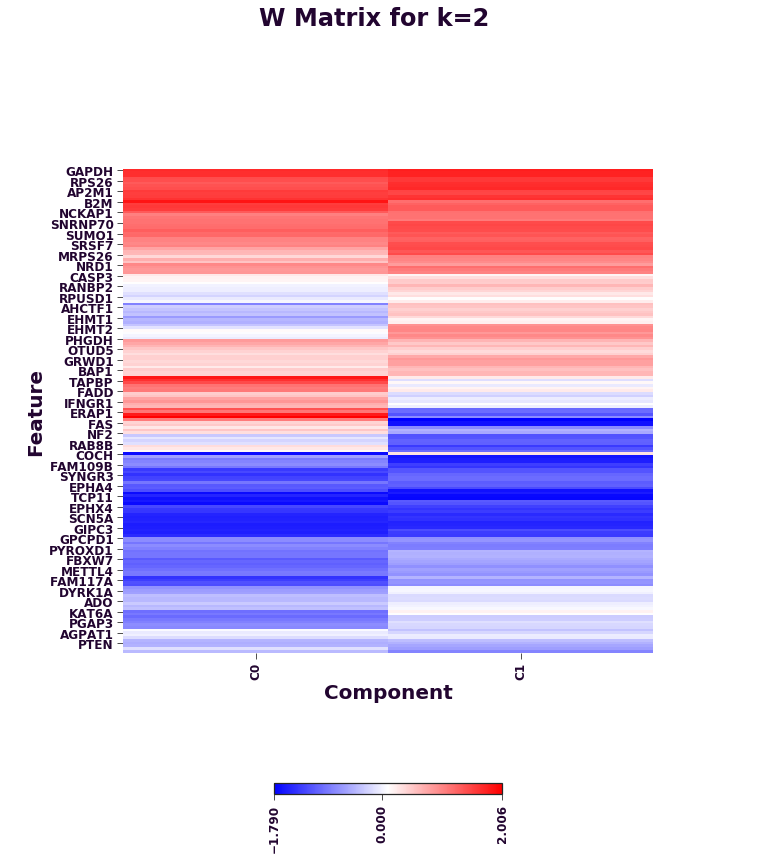

No handles with labels found to put in legend.
No handles with labels found to put in legend.


	K = 10: 11/30 ...


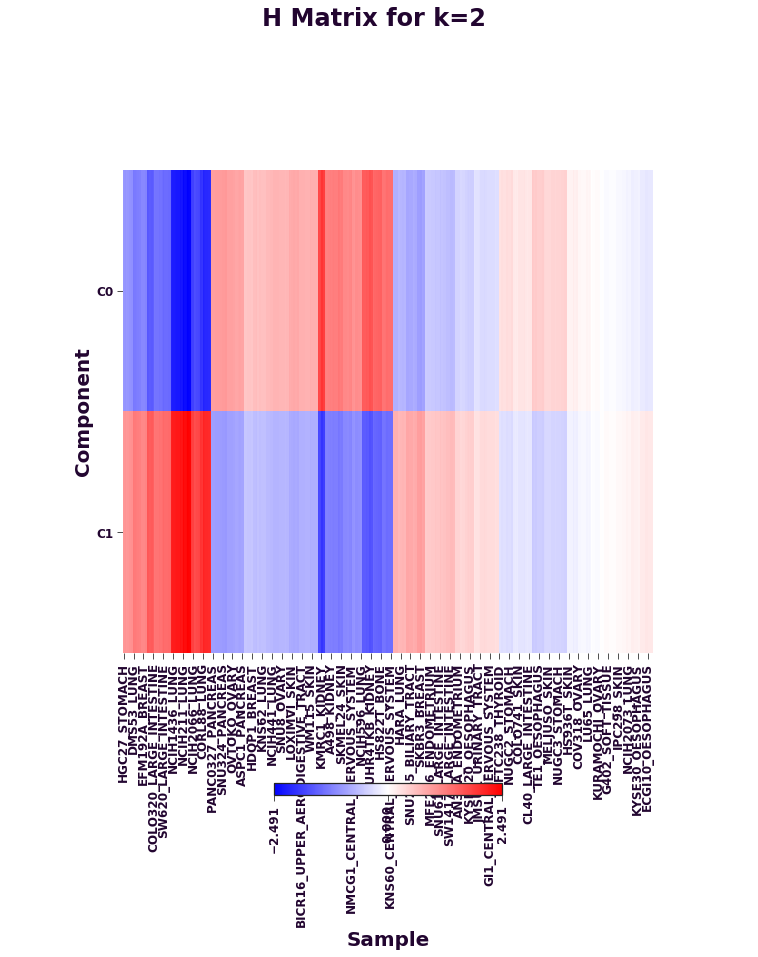

No handles with labels found to put in legend.
No handles with labels found to put in legend.


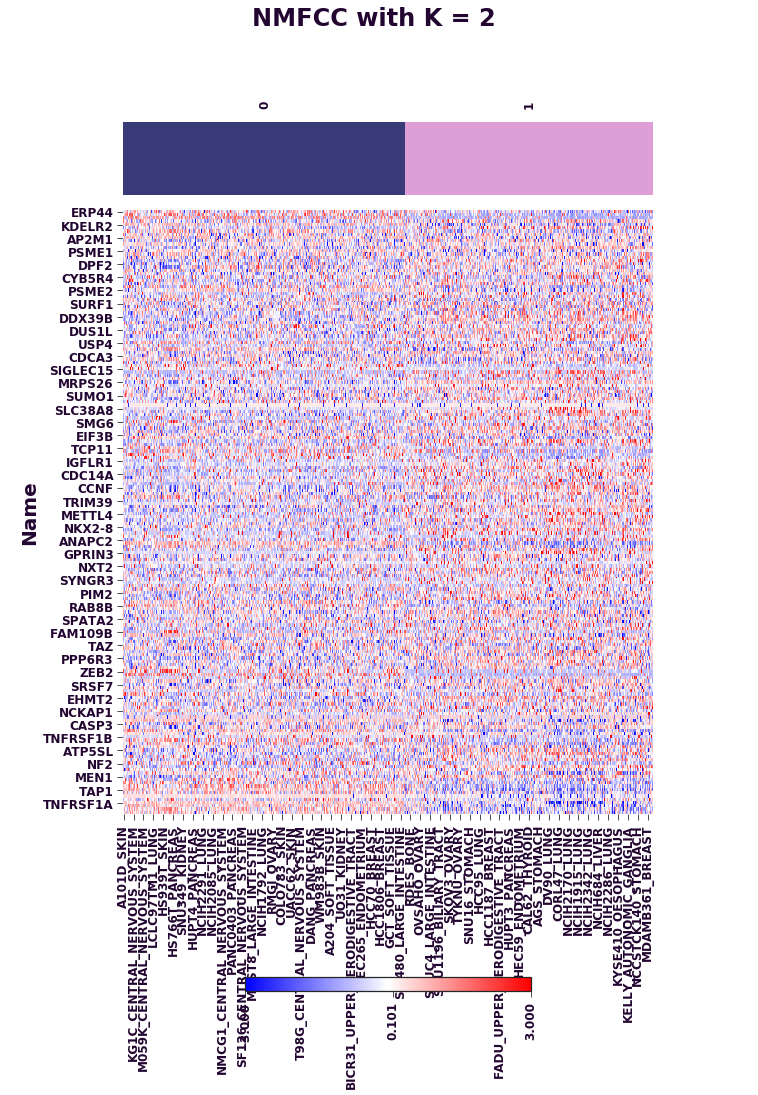

	K = 5: 21/30 ...
	K = 3: 30/30 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

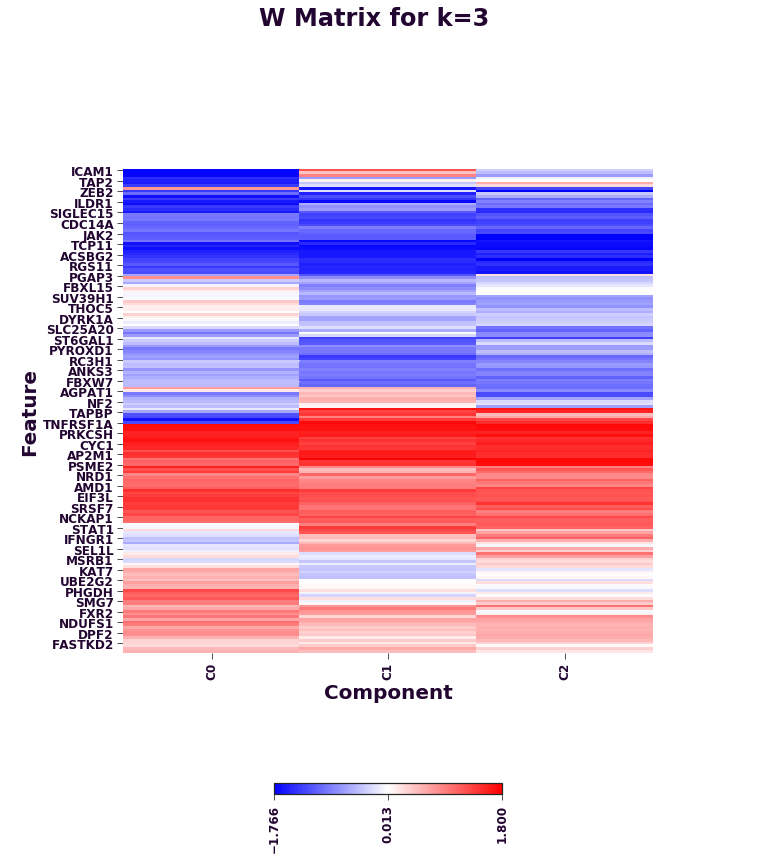

No handles with labels found to put in legend.
No handles with labels found to put in legend.


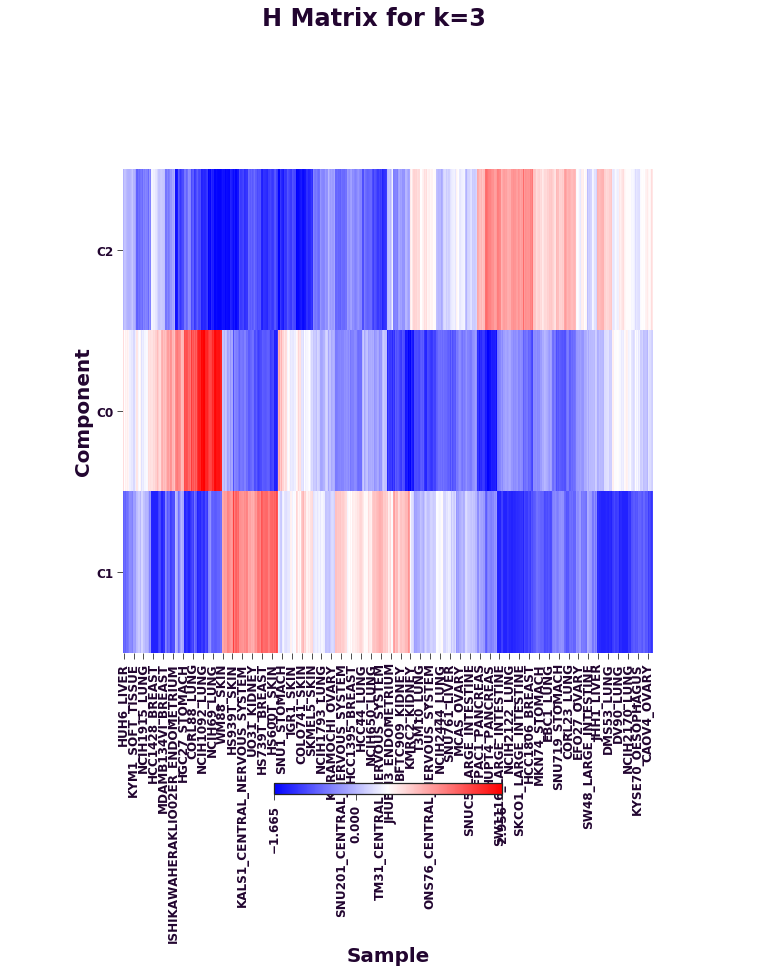

No handles with labels found to put in legend.
No handles with labels found to put in legend.


	K = 6: 21/30 ...


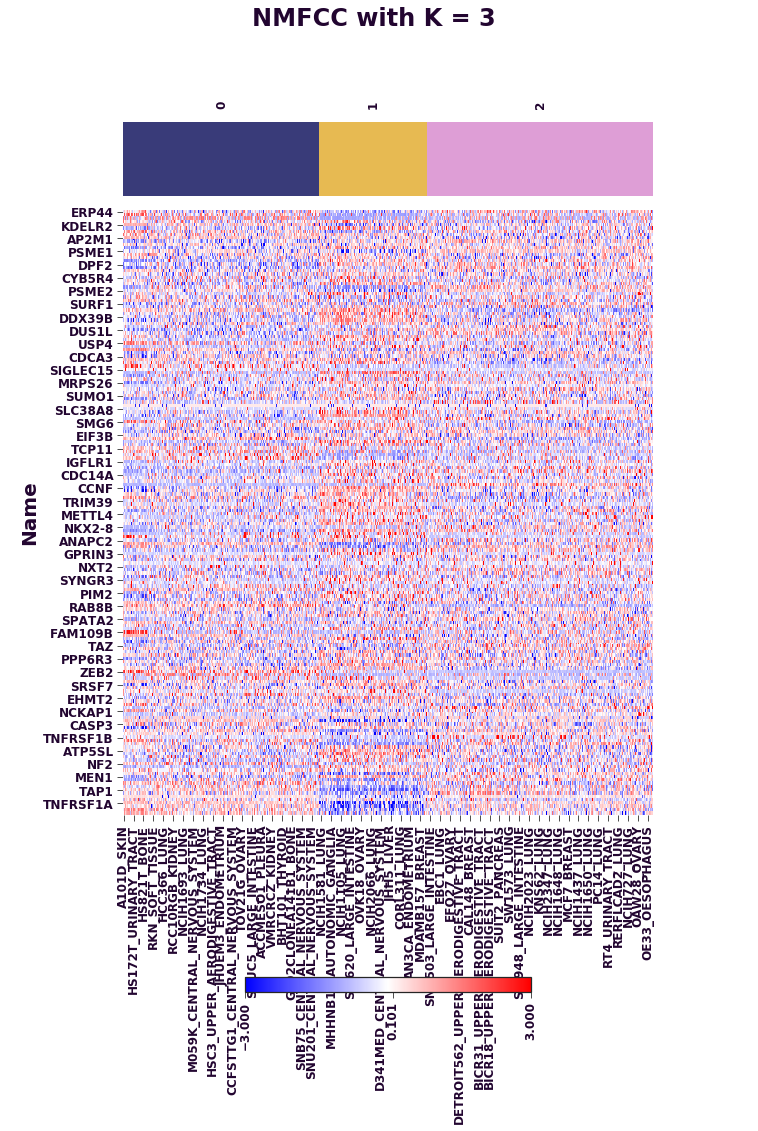

	K = 4: 30/30 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

	K = 7: 21/30 ...


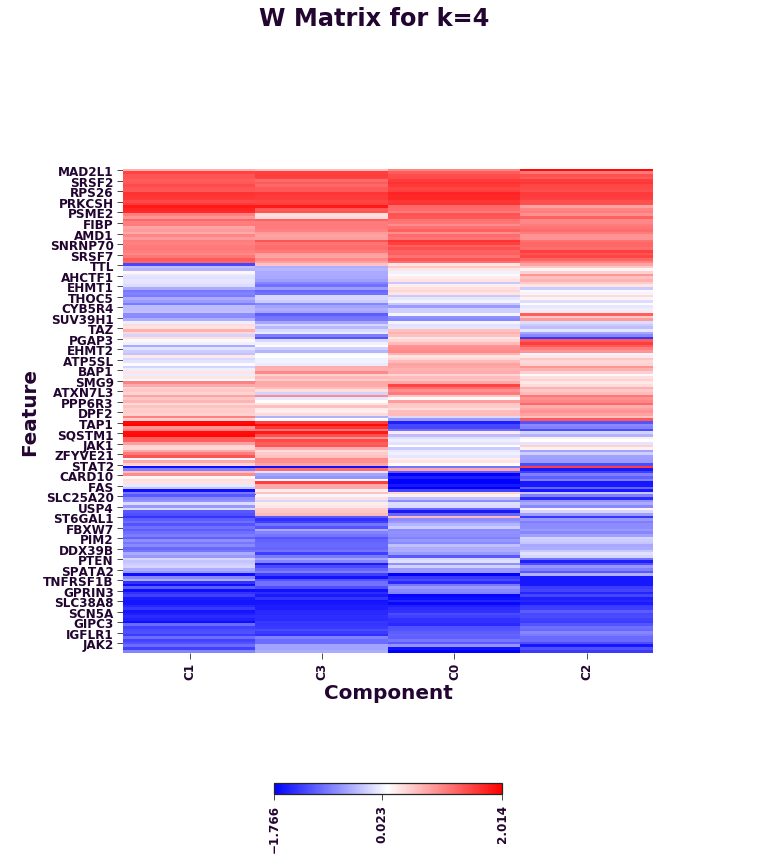

No handles with labels found to put in legend.
No handles with labels found to put in legend.


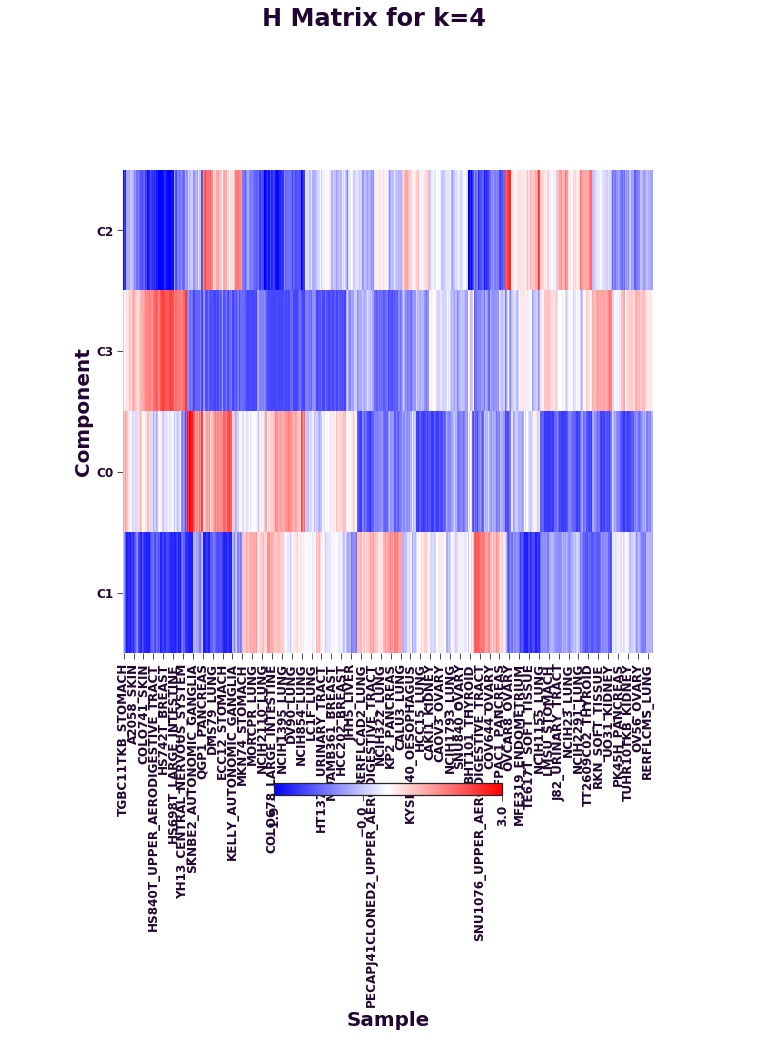

No handles with labels found to put in legend.
No handles with labels found to put in legend.


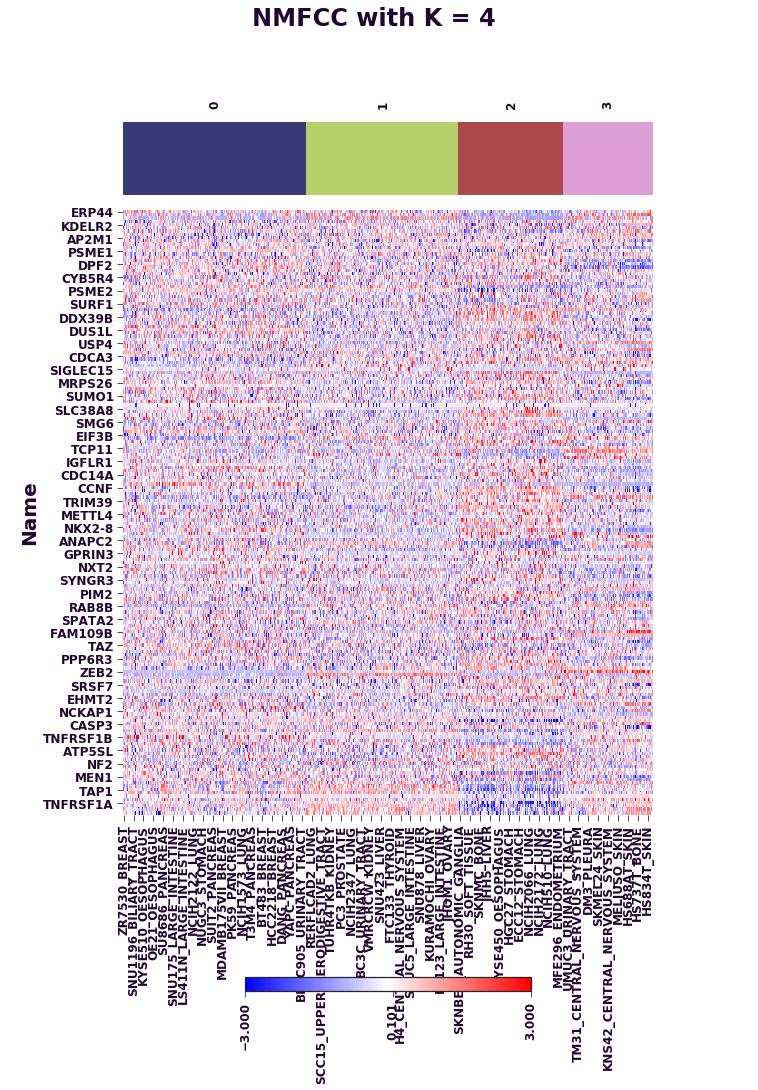

	K = 8: 21/30 ...
	K = 5: 30/30 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

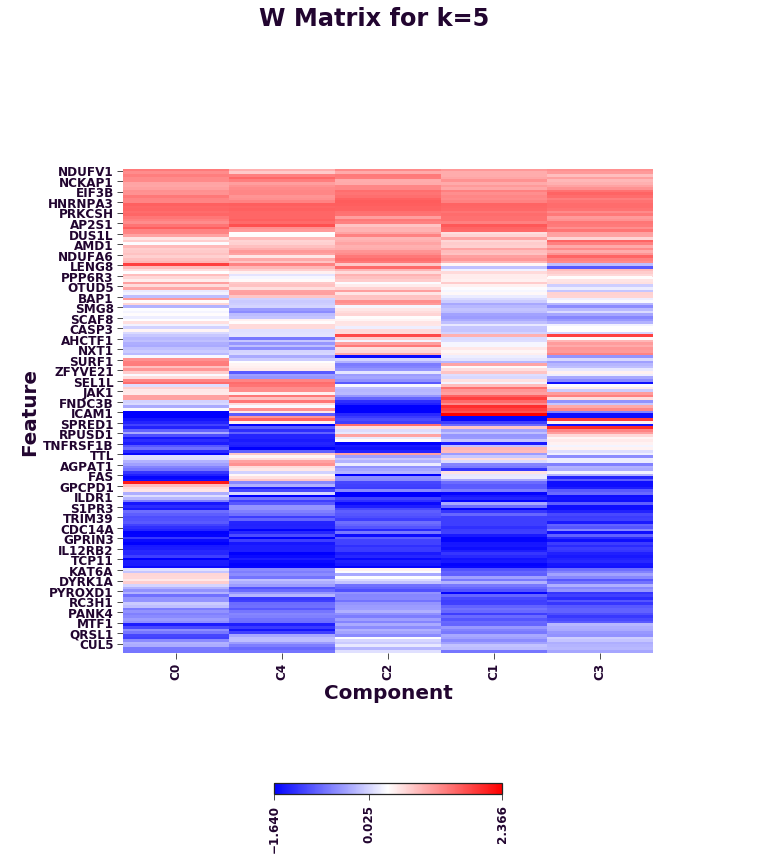

No handles with labels found to put in legend.
No handles with labels found to put in legend.


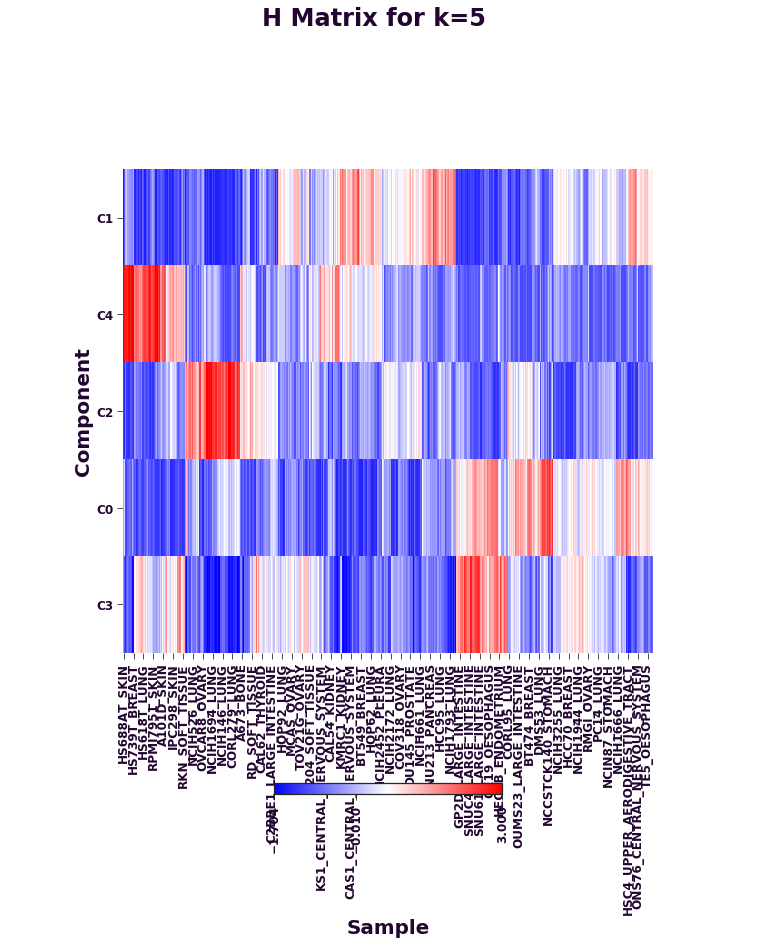

No handles with labels found to put in legend.
No handles with labels found to put in legend.


	K = 9: 21/30 ...


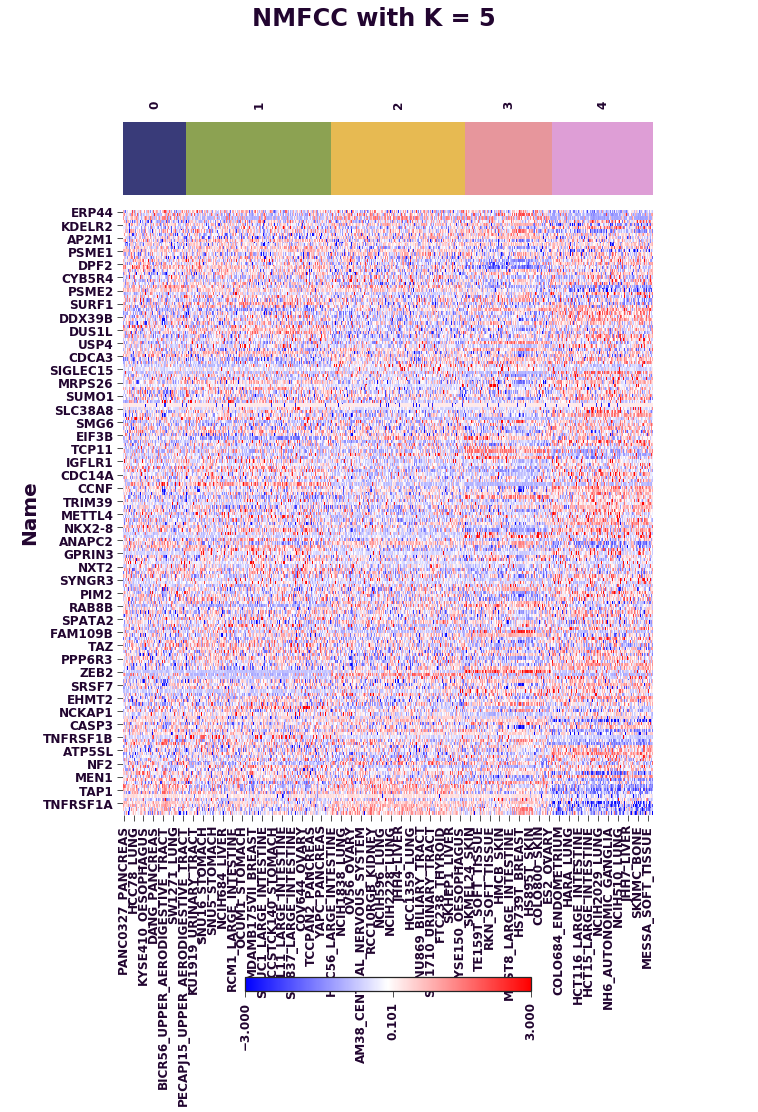

	K = 10: 21/30 ...
	K = 6: 30/30 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

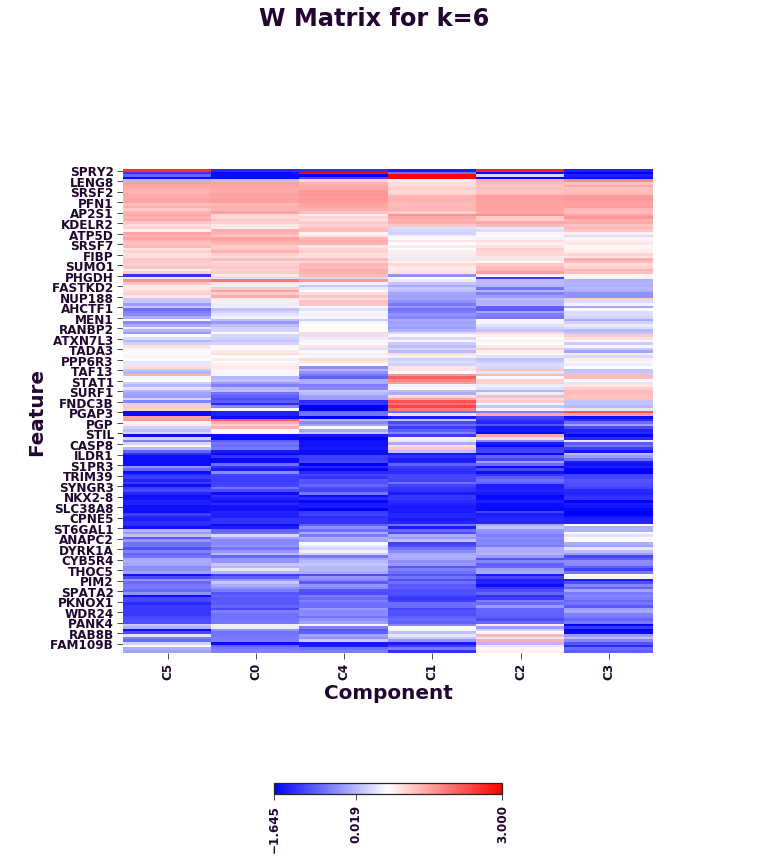

No handles with labels found to put in legend.
No handles with labels found to put in legend.


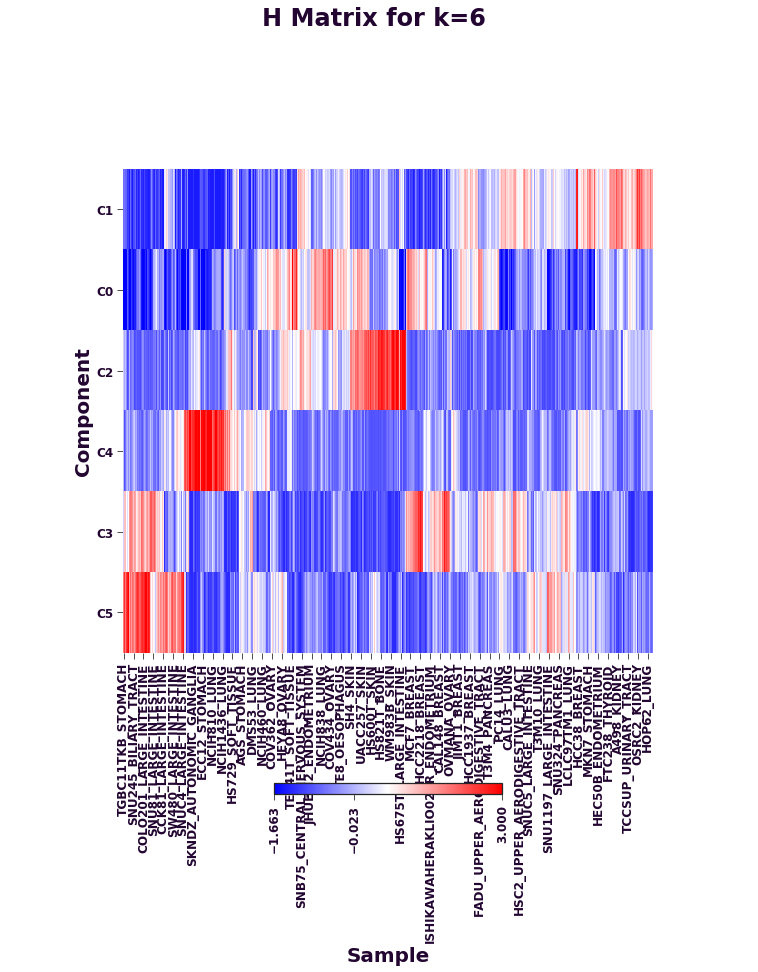

No handles with labels found to put in legend.
No handles with labels found to put in legend.


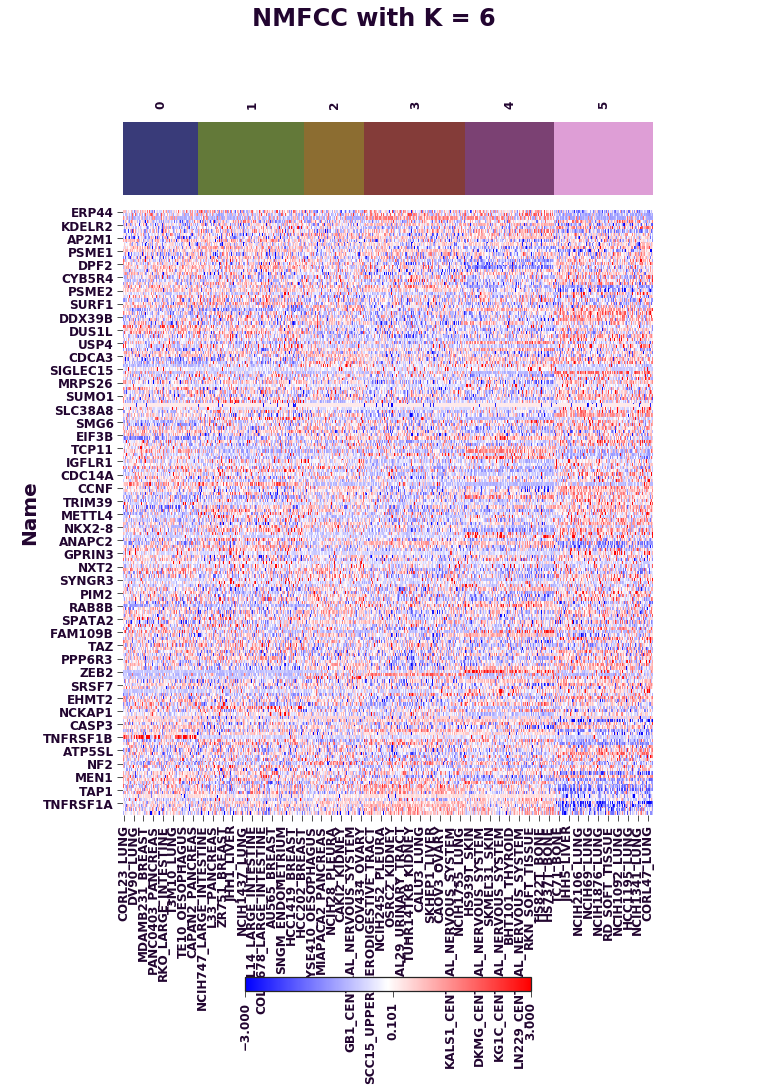

	K = 7: 30/30 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

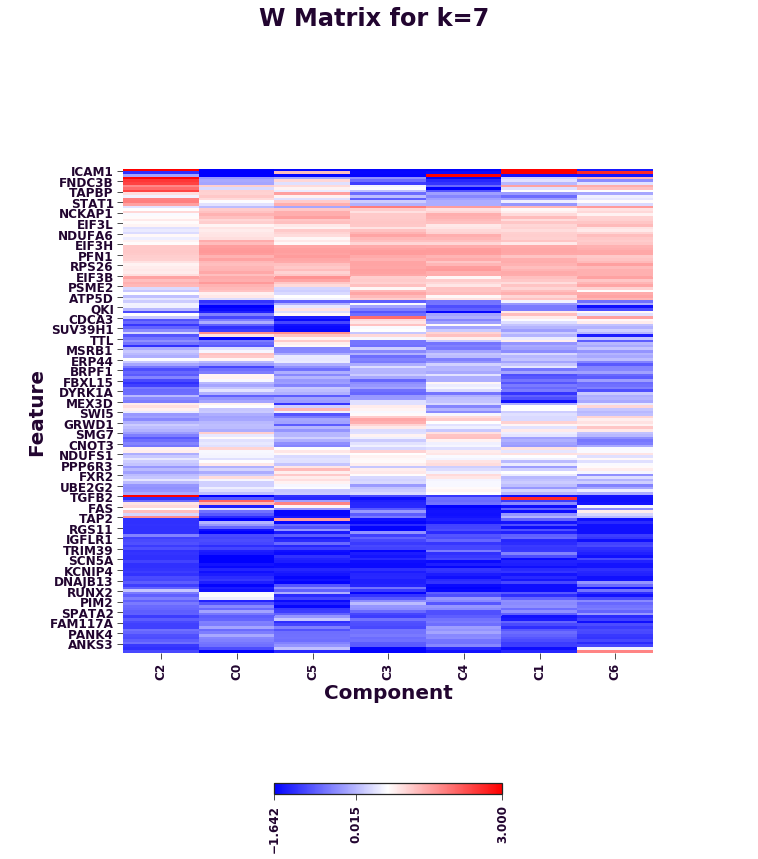

No handles with labels found to put in legend.
No handles with labels found to put in legend.


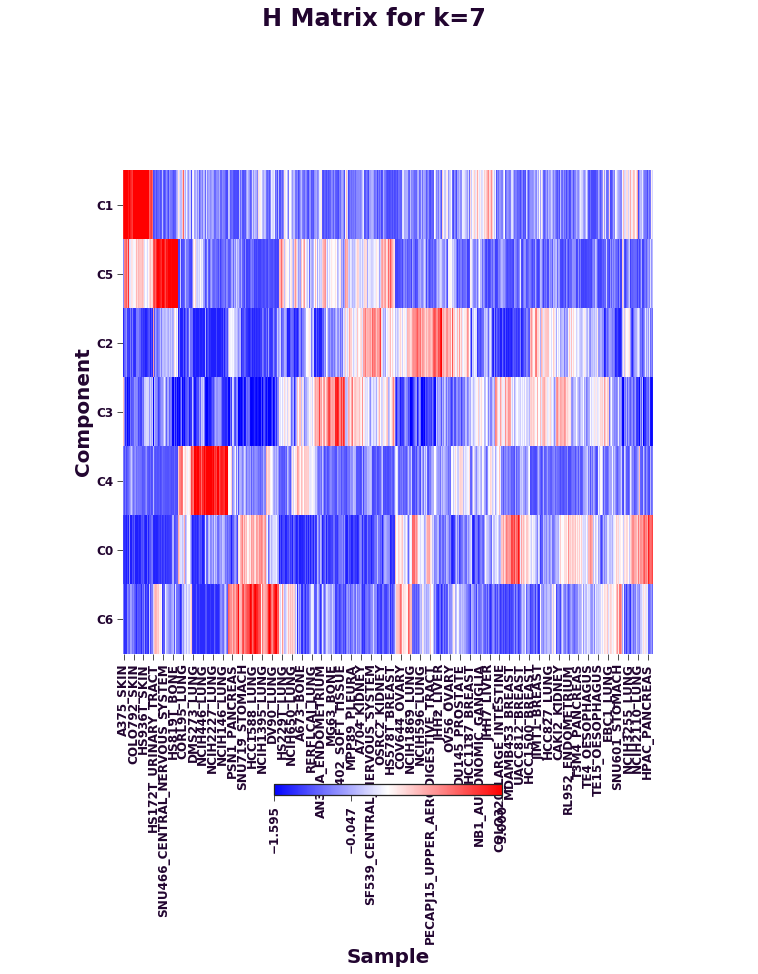

No handles with labels found to put in legend.
No handles with labels found to put in legend.


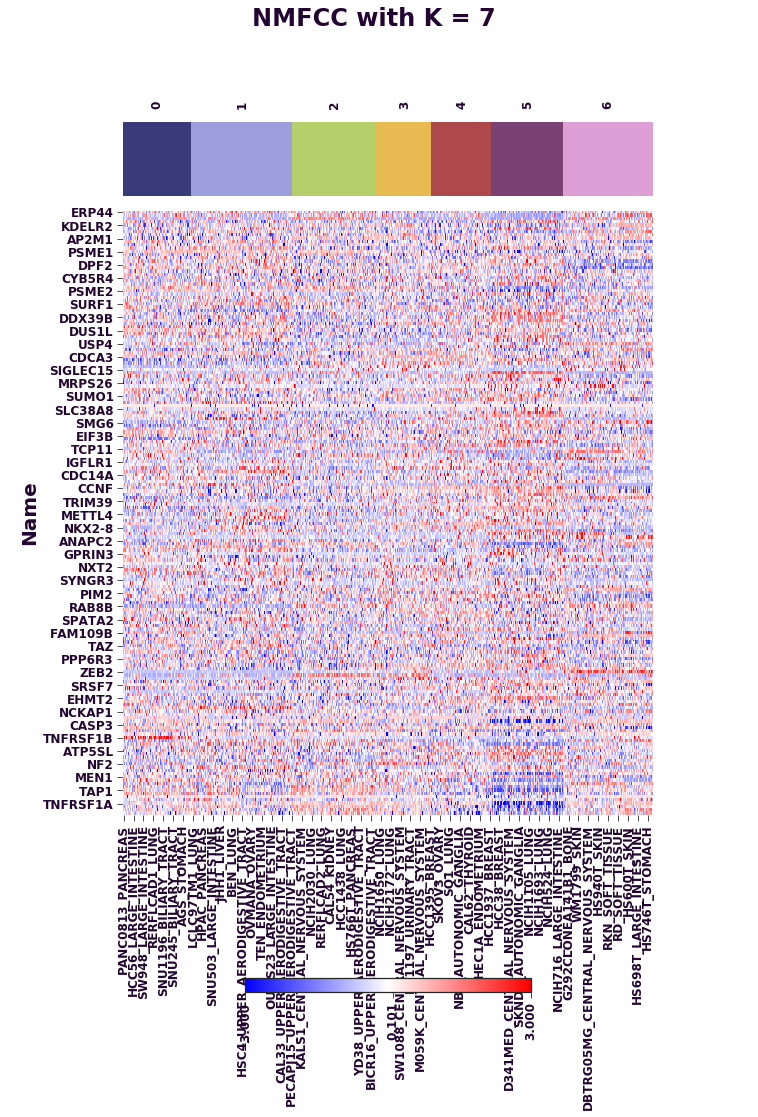

	K = 8: 30/30 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

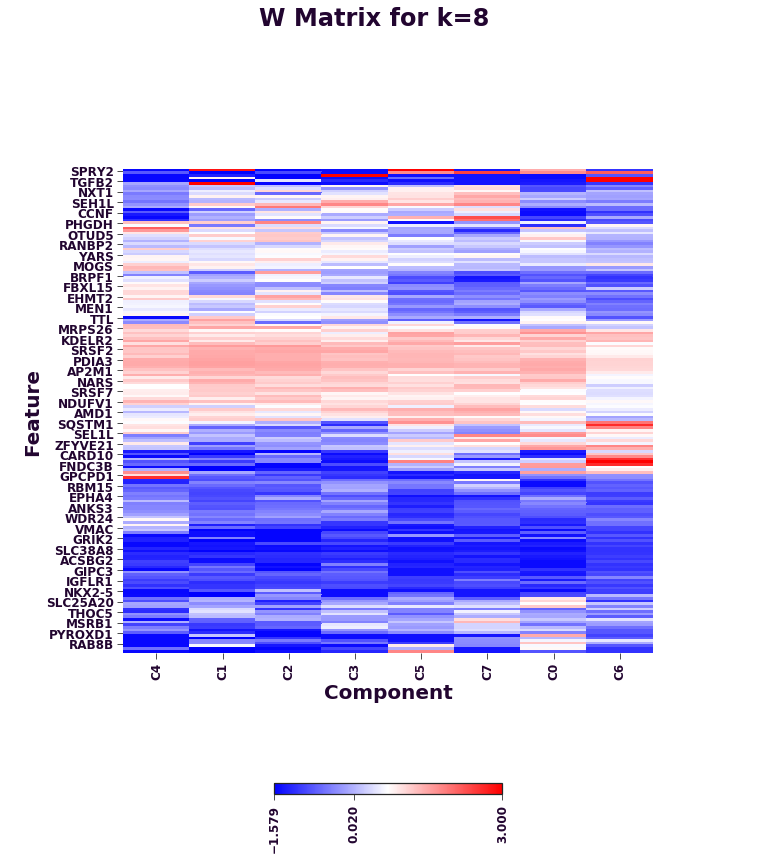

No handles with labels found to put in legend.
No handles with labels found to put in legend.


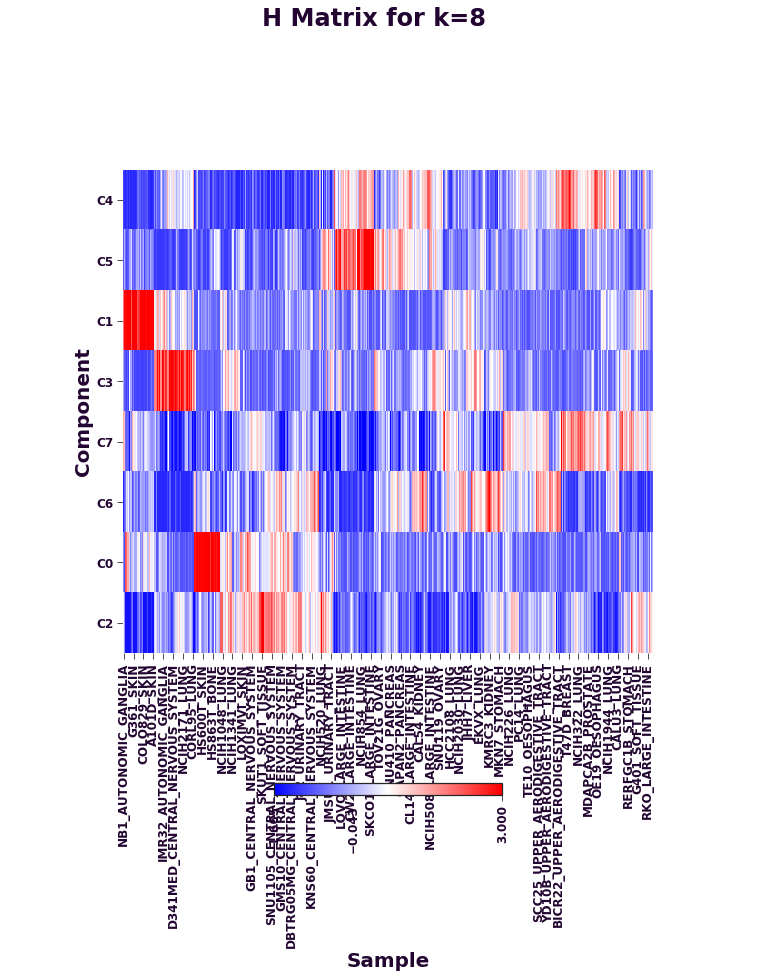

No handles with labels found to put in legend.
No handles with labels found to put in legend.


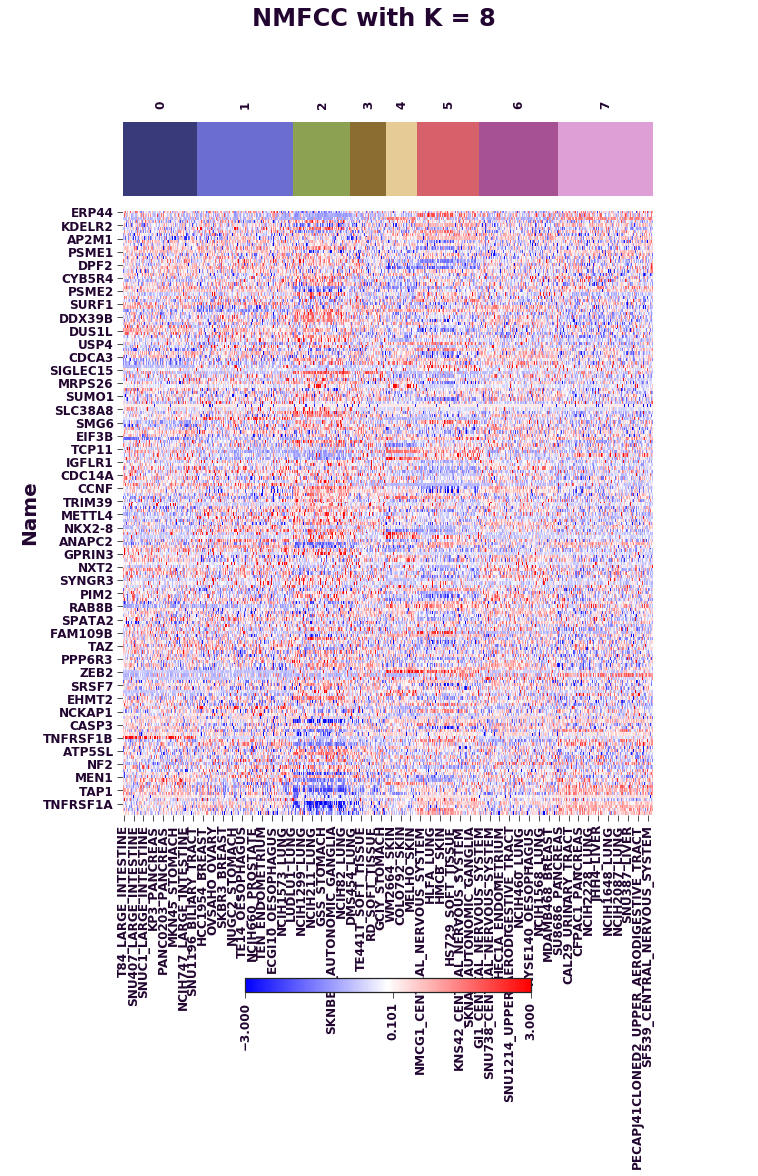

	K = 9: 30/30 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

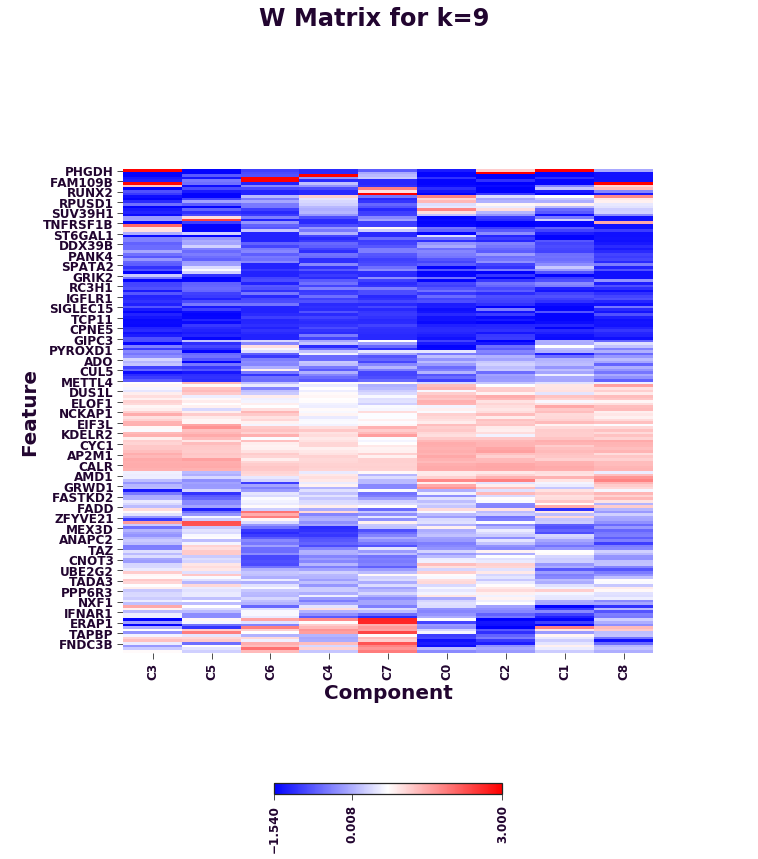

No handles with labels found to put in legend.
No handles with labels found to put in legend.


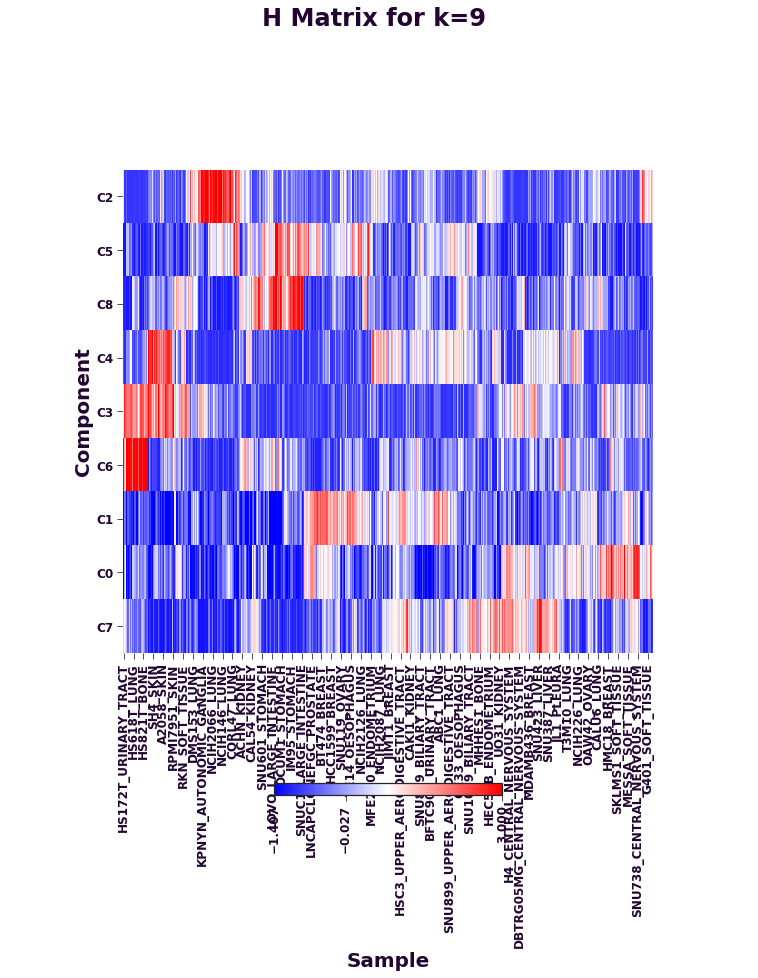

No handles with labels found to put in legend.
No handles with labels found to put in legend.


	K = 10: 30/30 - done.


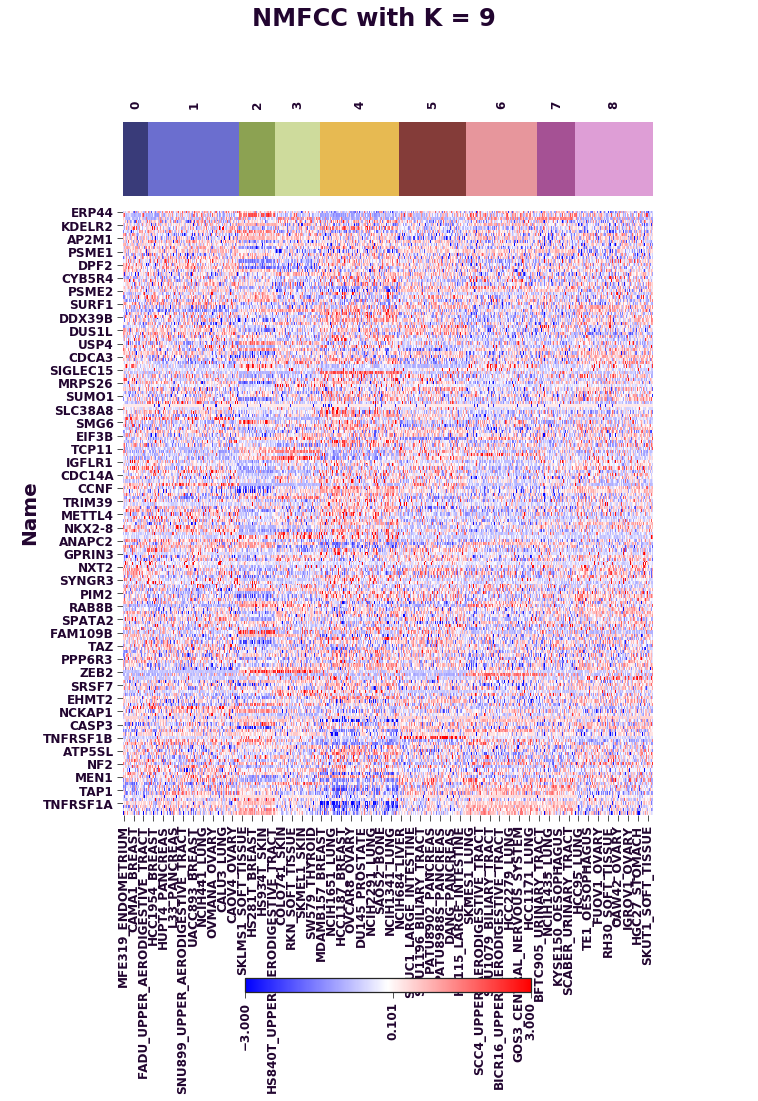

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

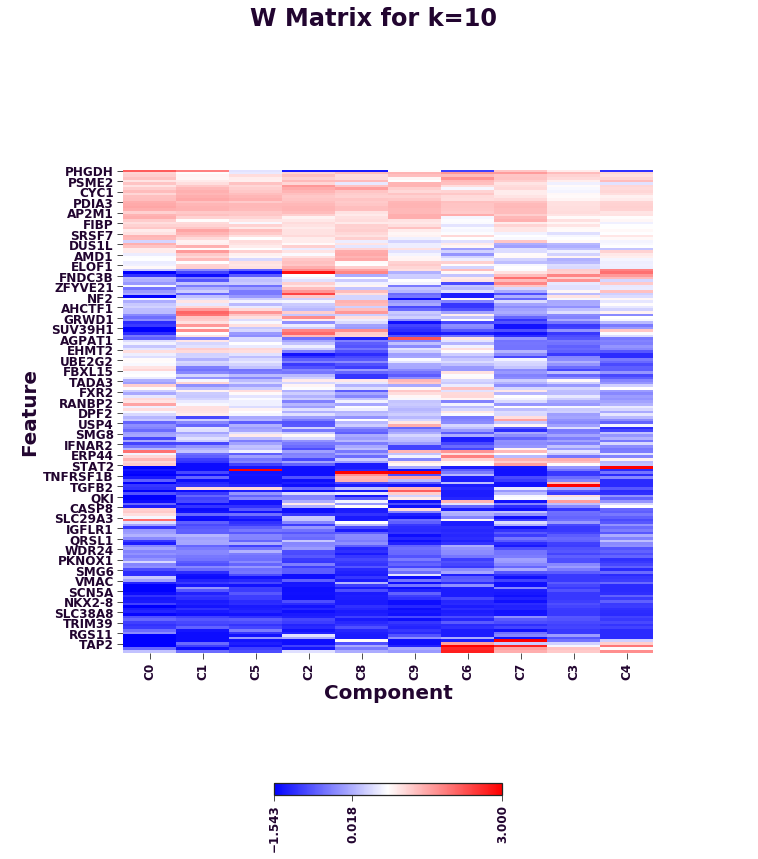

No handles with labels found to put in legend.
No handles with labels found to put in legend.


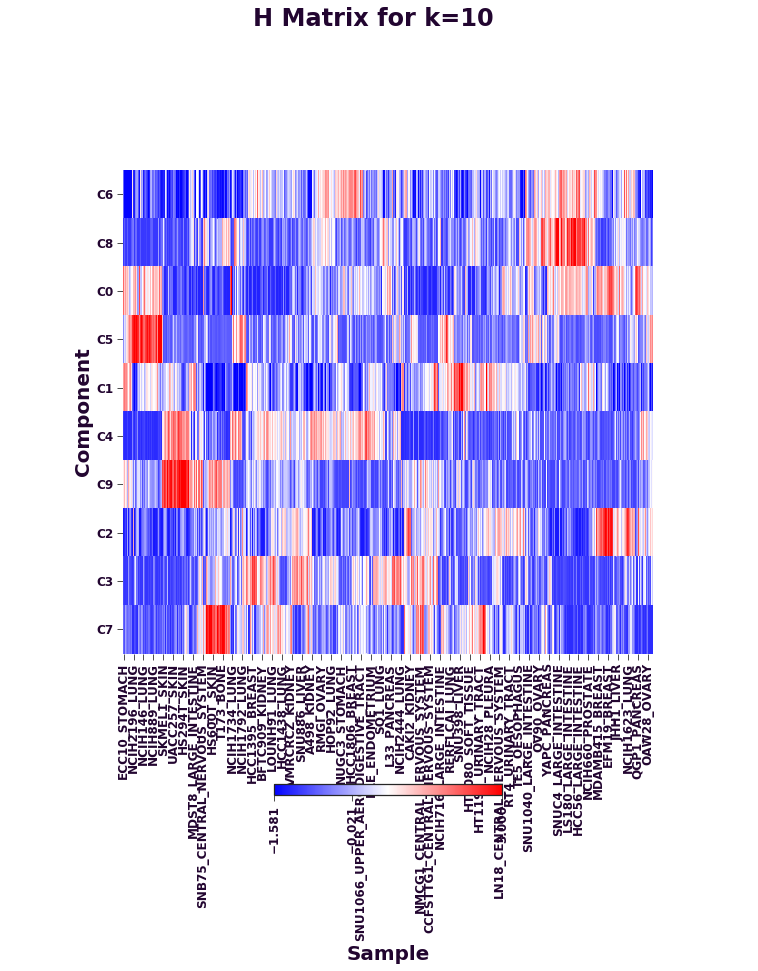

No handles with labels found to put in legend.
No handles with labels found to put in legend.


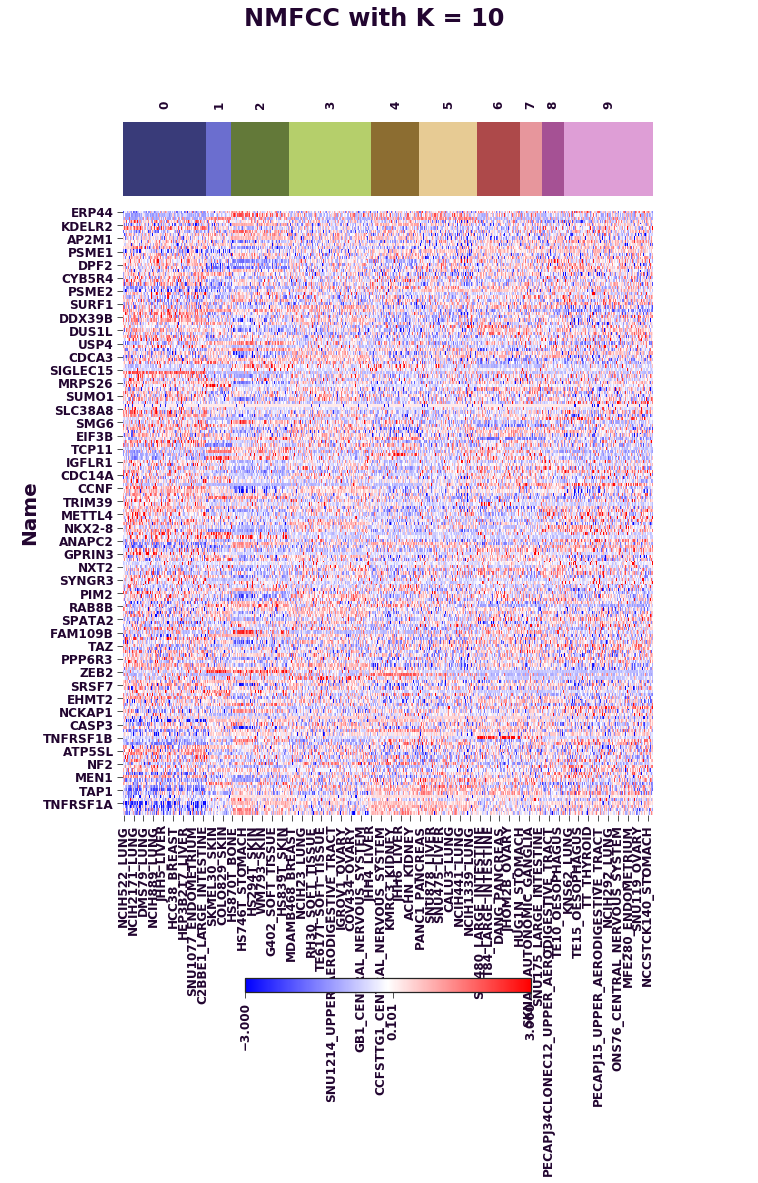

No handles with labels found to put in legend.


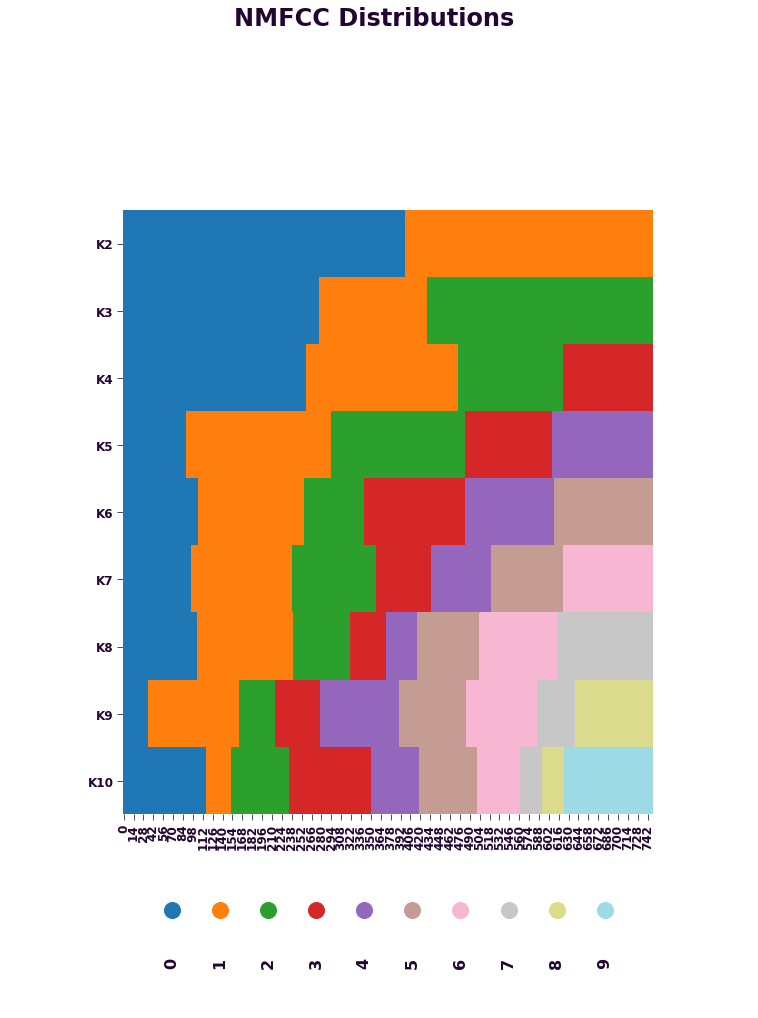

No handles with labels found to put in legend.


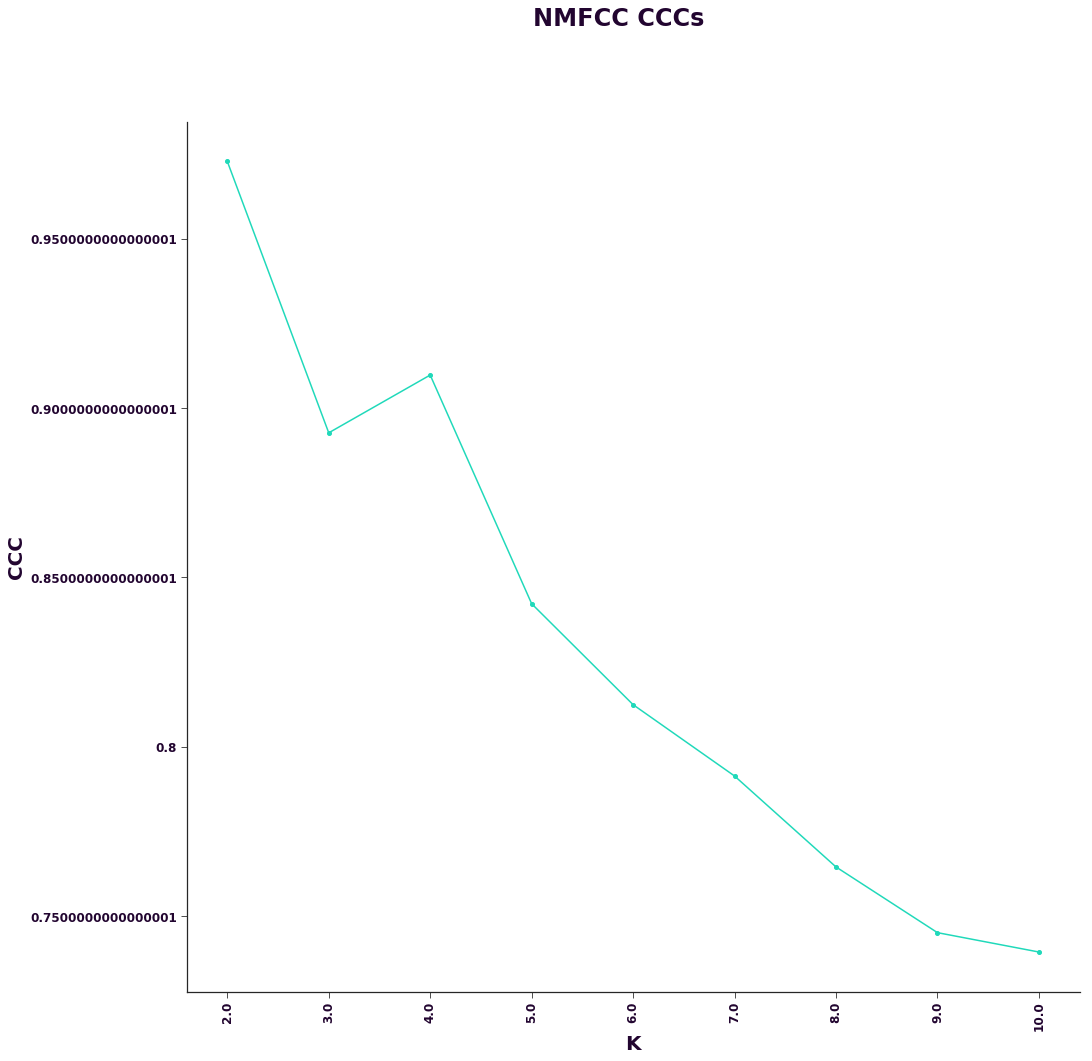

In [12]:
nmfs, nmfccs, cccs = ccal.define_components(
     rpkm__kras_relevant_gene_x_ccle_cellline,
     range(2, 11),
     '../output/nmfccs_ccle',
     algorithm='ls',
     n_clusterings=30,
     n_jobs=9,
     random_seed=6137)

### 5. Read H and W matrices of optimal decomposition (k=9) and re-label components

Looking at the results of the prior computation we can see that there is an optimal solution for k= 9 components. So the code below reads the H and W matrices of k=9. Here the components are also relabeled to match the labeling used in the article. The reason for the different labeling is that the original component numbers used in the article were generated using an earlier version of the Onco-GPS code written in the R language that used different random numbers to initiallize the $W$ and $H$ matrices.

In [5]:
w_matrix = pd.read_table('../output/nmfccs_ccle/nmf_k4_w.txt', index_col=0)
h_matrix = pd.read_table('../output/nmfccs_ccle/nmf_k4_h.txt', index_col=0)

In [7]:
# Re-label components to have same names as in the paper
indices = [
    'C1',
    'C3',
    'C9',
    'C8',
    'C6',
    'C7',
    'C5',
    'C2',
    'C4',
]

w_matrix.columns = indices
h_matrix.index = indices

w_matrix.to_csv('../output/nmfccs/nmf_k9_w.txt', sep='\t')
h_matrix.to_csv('../output/nmfccs/nmf_k9_h.txt', sep='\t')

### 6. Plot H and W matrices

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

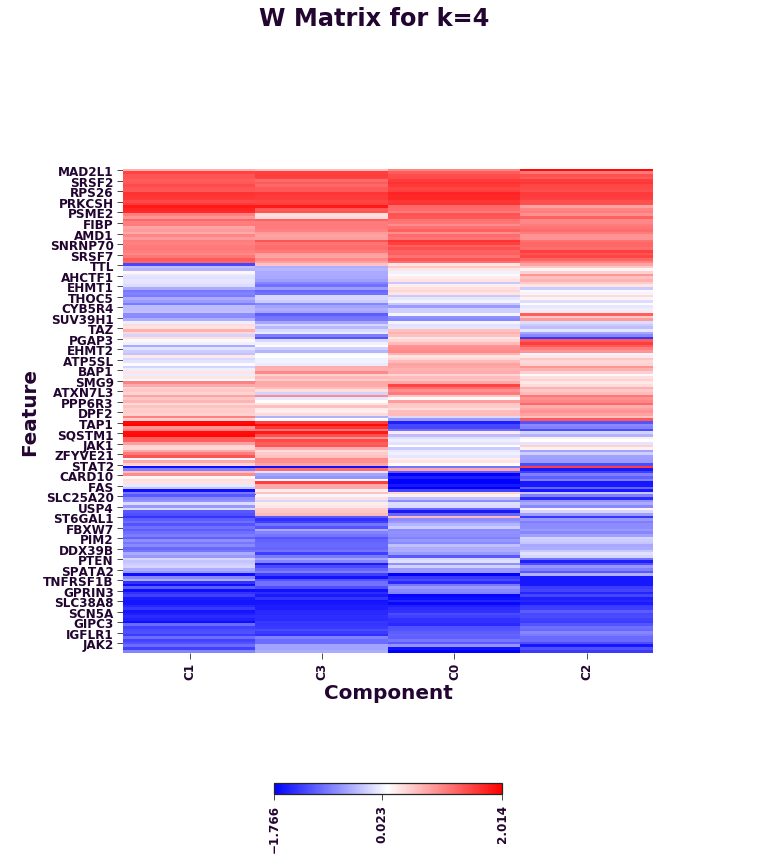

No handles with labels found to put in legend.
No handles with labels found to put in legend.


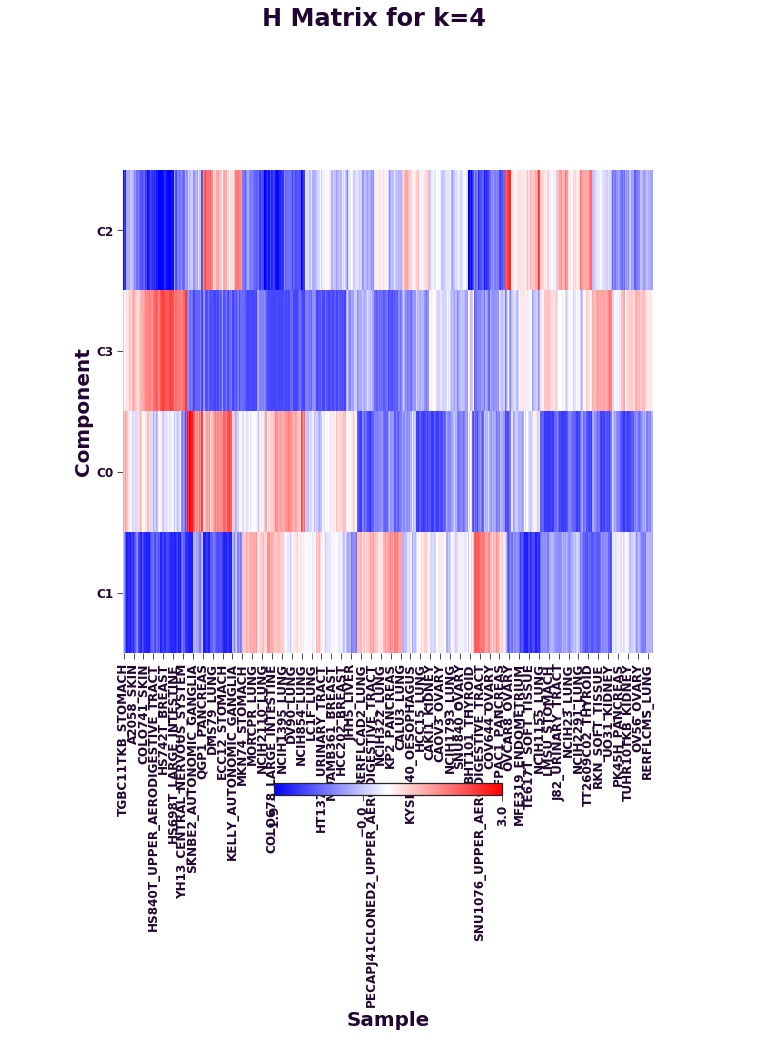

In [14]:
ccal.plot_nmf(w_matrix, h_matrix)

### 6. Compare the NMF components with each other using the information coefficient
This computation generates an association matrix that compares the component profiles against each other using the Information Coefficient. This is Fig S6A in the article and shows that the components are distinct.

Applying <function compute_information_coefficient at 0x7fa9ca227598> ...
	1/4 ...
	4/4 - done.


No handles with labels found to put in legend.


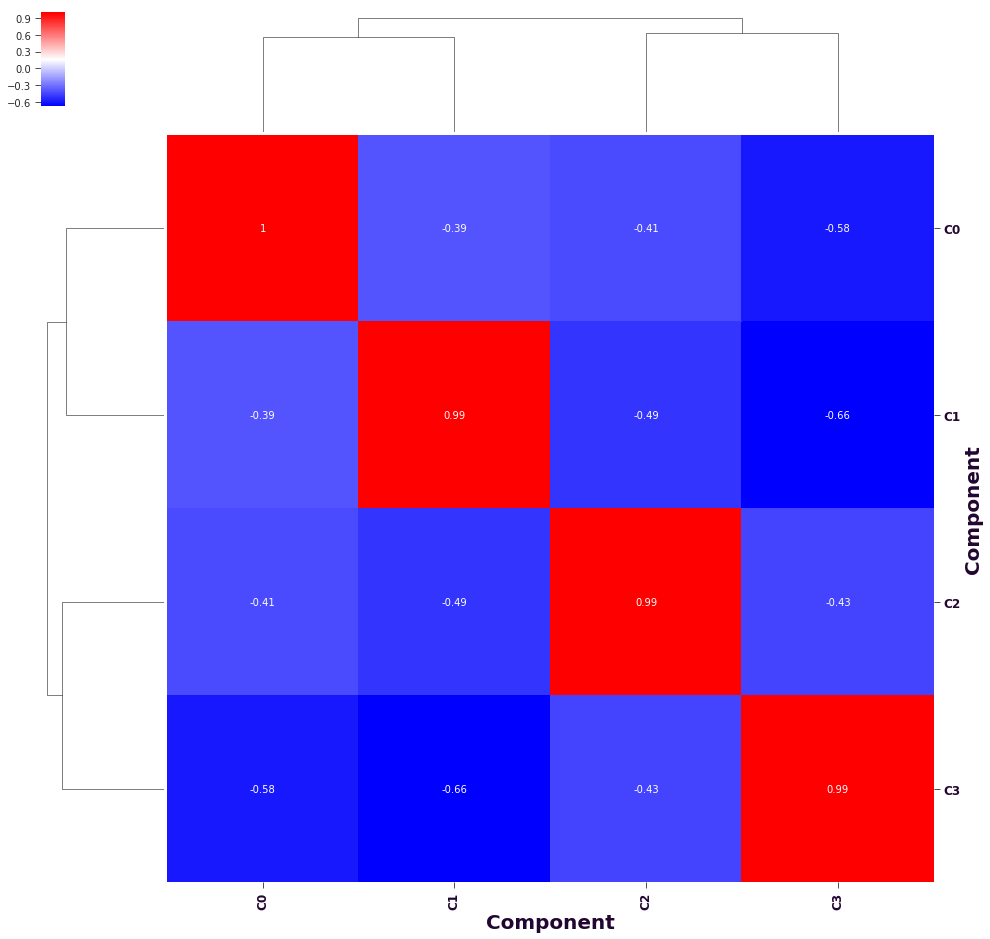

C0        C1        C2        C3
C0  0.995363 -0.387684 -0.414177 -0.580187
C1 -0.387684  0.992963 -0.486618 -0.659868
C2 -0.414177 -0.486618  0.994175 -0.434127
C3 -0.580187 -0.659868 -0.434127  0.994191

In [15]:
ccal.make_comparison_panel(
    h_matrix,
    h_matrix,
    axis=1,
    array_2d_0_name='Component',
    array_2d_1_name='Component')

### [Next chapter (4)](4 Annotate transcriptional components.ipynb) 

In [6]:
df = pd.read_table('B9991003.mbiogs.20190717.exp.cdc.tsv', index_col=0)
df = df.T
log = df.index.isin(rownm)
df = df[log]
df

row_id    B9991003 X00936b9285d6b8665ae9122993fb8e91  \
ABHD16A                                         2.59   
ACSBG2                                          0.01   
ADO                                             3.71   
AGPAT1                                          2.72   
AHCTF1                                          5.82   
AMD1                                            3.73   
ANAPC2                                          5.16   
ANKS3                                           4.67   
AP2M1                                           7.92   
AP2S1                                           7.43   
ARID1A                                          7.59   
ATP5D                                           7.71   
ATP5SL                                          4.60   
ATXN7L3                                         3.83   
B2M                                            11.59   
BAP1                                            5.85   
BRPF1                                           3.84   
CALR                                           10.84   
CARD10                                          4.91   
CASP3                                           4.92   
CASP8                                           5.18   
CCNF                                            2.91   
CDC14A                                          3.64   
CDCA3                                           0.84   
CNOT3                                           5.24   
COCH                                            1.53   
CPNE5                                           2.61   
CRISP1                                          0.01   
CUL5                                            5.94   
CYB5R4                                          4.87   
...                                              ...   
STAT1                                           7.86   
STAT2                                           6.67   
STIL                                            3.55   
SUMO1                                           6.05   
SURF1                                           3.94   
SUV39H1                                         1.85   
SWI5                                            4.14   
SYNGR3                                          0.01   
TADA3                                           5.21   
TAF13                                           5.66   
TAP1                                            3.80   
TAP2                                            2.49   
TAPBP                                           6.68   
TAZ                                             4.85   
TCP11                                           0.01   
TGFB2                                           4.92   
THOC5                                           4.56   
TNFRSF1A                                        8.02   
TNFRSF1B                                        5.67   
TRADD                                           5.49   
TRIM39                                          0.01   
TTL                                             4.84   
UBE2G2                                          3.49   
USP4                                            4.90   
VMAC                                            2.85   
WDR24                                           4.34   
YARS                                            6.57   
ZCCHC14                                         5.02   
ZEB2                                            6.66   
ZFYVE21                                         5.30   

row_id    B9991003 X105622fadc33f23755ac2df823110aca  \
ABHD16A                                         1.93   
ACSBG2                                          0.01   
ADO                                             3.14   
AGPAT1                                          1.86   
AHCTF1                                          5.88   
AMD1                                            2.93   
ANAPC2                                          4.78   
ANKS3                                           3.06   
AP2M1                  

In [57]:
h_pred = np.linalg.pinv(w_matrix[w_matrix.index.isin(list(df.index))]).dot(df)
h_pred_df = pd.DataFrame(h_pred, index=['C0', 'C1', 'C2', 'C3'], columns=df.columns)
h_pred_df

row_id  B9991003 X00936b9285d6b8665ae9122993fb8e91  \
C0                                        5.030782   
C1                                        1.729781   
C2                                        1.138993   
C3                                        0.388034   

row_id  B9991003 X105622fadc33f23755ac2df823110aca  \
C0                                        4.776649   
C1                                        1.626122   
C2                                        0.563017   
C3                                        0.405706   

row_id  B9991003 Xe44f39747a8e84b02b4cb24659312144  \
C0                                        5.185943   
C1                                        1.916492   
C2                                        0.868423   
C3                                        0.497179   

row_id  B9991003 X293dd1284496215e9a0eca9f17a98e7e  \
C0                                        5.115268   
C1                                        1.842172   
C2                                        0.989094   
C3                                        0.453757   

row_id  B9991003 X01ed7190ce00862696edbf047b542045  \
C0                                        5.281211   
C1                                        1.680152   
C2                                        1.072434   
C3                                        0.386771   

row_id  B9991003 Xf4a6a5a1450a8448882e1c0aebc0eea5  \
C0                                        5.023346   
C1                                        1.582805   
C2                                        1.168708   
C3                                        0.338321   

row_id  B9991003 Xf7ee4a331a8fd70edc240dff978c170d  \
C0                                        5.361798   
C1                                        1.624240   
C2                                        0.871631   
C3                                        0.802842   

row_id  B9991003 Xcddbd4d01bc7513298a5135e97cfdb6b  \
C0                                        4.494193   
C1                                        1.663331   
C2                                        1.488082   
C3                                        0.649124   

row_id  B9991003 Xa57451efa2822becb256706fe939d078  \
C0                                        5.054105   
C1                                        1.557601   
C2                                        1.545338   
C3                                        0.463851   

row_id  B9991003 Xff8fbe2fe76c82d429d4fa1d315f3b93  \
C0                                        5.324638   
C1                                        2.031232   
C2                                        1.091390   
C3                                        0.096393   

row_id                     ...                      \
C0                         ...                       
C1                         ...                       
C2                         ...                       
C3                         ...                       

row_id  B9991003 Xa7d2bd80340b4019986ea8d8c3638c75  \
C0                                        5.544519   
C1                                        1.398819   
C2                                        0.919066   
C3                                        0.534239   

row_id  B9991003 Xbc7a029dc7ce4b19a5a2b78a7b2fc6ae  \
C0                                        4.436473   
C1                                        1.357305   
C2                                        1.505134   
C3                                        0.598947   

row_id  B9991003 X13b911b56a330efd2660b67b1cf98466  \
C0                                        5.439294   
C1                                        2.052878   
C2                                        0.819783   
C3                                        0.130482   

row_id  B9991003 X9388bd484d0e404c6732573b4228d2a2  \
C0                                        5.173232   
C1                                        1.686565   
C2                                        1.

In [58]:
w_pred_df = df.dot(np.linalg.pinv(h_pred))
w_pred_df.columns = ['C0', 'C1', 'C2', 'C3']
w_pred_df

C0        C1        C2        C3
ABHD16A   0.218202  0.524739  0.087979  0.607243
ACSBG2   -0.030783  0.082592 -0.049628  0.209591
ADO       0.222097  1.109888  0.408131  1.095596
AGPAT1    0.237456  0.349164  0.380052  0.396130
AHCTF1    0.825942  0.472634  0.667604  0.400570
AMD1      0.727920 -0.061706  0.417083 -0.149130
ANAPC2    0.496418  1.447683 -0.181623  1.079734
ANKS3     0.482071  0.734812  0.293420  0.666331
AP2M1     0.885868  1.112872  1.351802  0.960508
AP2S1     0.711821  1.324451  1.228477  1.082454
ARID1A    0.850468  1.133649  0.736452  0.809196
ATP5D     1.073565  0.553647  1.087656  0.542817
ATP5SL    0.493789  0.639196  0.466012  0.716100
ATXN7L3   0.235981  1.069743  0.323371  1.014623
B2M       1.564894  0.762049  1.923290  1.074461
BAP1      0.522058  1.396671  0.243838  1.064816
BRPF1     0.284059  1.375445 -0.002205  1.273736
CALR      1.034080  1.564976  2.122022  1.004889
CARD10    0.599044  0.623629  0.794446  0.186699
CASP3     0.519077  0.683928  0.934750  0.662047
CASP8     0.661673  0.355415  1.128096  0.483211
CCNF     -0.209026  1.533117  0.884307  1.068416
CDC14A    0.639930  0.175802 -0.003475 -0.076974
CDCA3    -0.510519  1.444476  0.909846  0.822352
CNOT3     0.537057  1.026919  0.464913  0.819013
COCH      0.244115  0.067348 -0.221551  0.625520
CPNE5     0.149708  1.141156 -0.252497 -0.413643
CRISP1   -0.034090  0.088307 -0.045492  0.209440
CUL5      0.946733  0.189822  0.460253  0.260782
CYB5R4    0.750194  0.312263  0.753542  0.523167
...            ...       ...       ...       ...
STAT1     1.014428  0.595957  1.648662  1.225874
STAT2     0.544097  1.561301  0.812401  1.408761
STIL      0.130959  0.973536  1.047208  0.944038
SUMO1     0.945154  0.080050  0.897882  0.203499
SURF1     0.564654  0.633237  0.002696  1.033918
SUV39H1  -0.028027  0.789548  0.348785  0.781178
SWI5      0.402418  0.870697  0.272907  0.882855
SYNGR3   -0.212985  0.799029 -0.491268  1.356982
TADA3     0.388359  1.265813  0.551262  1.074262
TAF13     0.764113  0.284084  1.154245  0.373361
TAP1      0.386335  0.479258  0.939176  0.971594
TAP2      0.275105  0.340971  0.512924  0.566401
TAPBP     0.887069  0.278441  1.450048  0.488522
TAZ       0.435970  1.139477  0.329632  0.697701
TCP11    -0.019777  0.080011 -0.078315  0.233043
TGFB2     0.568779  0.491230  0.006816 -0.182793
THOC5     0.529094  0.751637  0.395203  0.690193
TNFRSF1A  0.856392  1.142433  1.430015  0.674152
TNFRSF1B  0.650741  0.985623  0.958900  0.736768
TRADD     0.640242  0.782281  0.906750  0.535042
TRIM39    0.006014 -0.008389 -0.005038  0.001056
TTL       0.286078  1.457289  0.314944  1.615620
UBE2G2    0.299092  0.631612  0.357903  0.449776
USP4      0.527425  1.097554  0.211805  0.996387
VMAC      0.136022  1.104174 -0.490198  1.227386
WDR24     0.259384  1.283024  0.056662  1.291910
YARS      0.519077  1.256914  1.182754  1.047238
ZCCHC14   0.593059  0.793778 -0.169788  0.585317
ZEB2      0.742327  1.067195  0.578840  0.641328
ZFYVE21   0.542081  0.896794  0.123872  0.700867

[184 rows x 4 columns]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

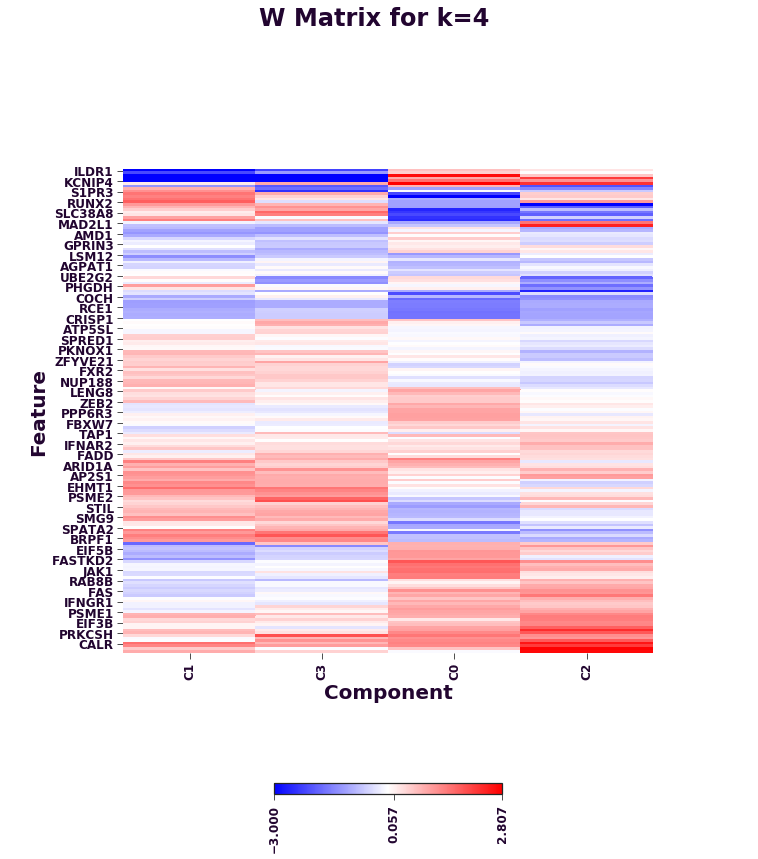

No handles with labels found to put in legend.
No handles with labels found to put in legend.


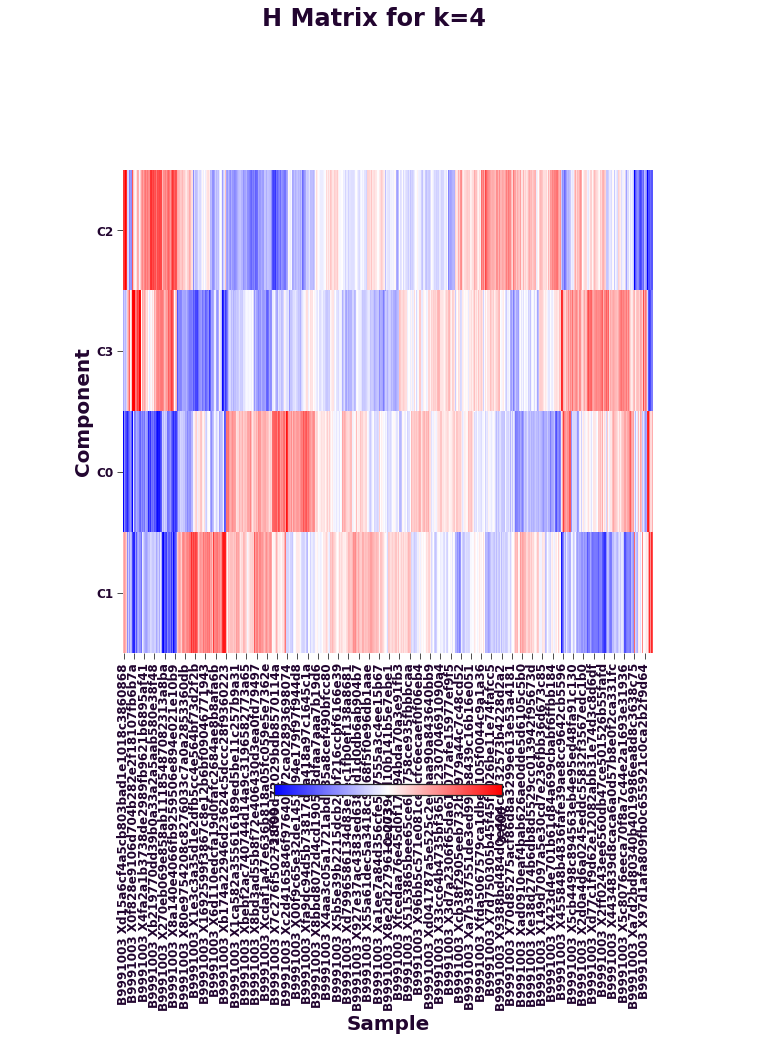

In [60]:
ccal.plot_nmf(w_pred_df, h_pred_df)